# Form

Attempt to analyse if form exists, and if so, what window in time are we looking at? Meaning, for a given GW, what size window do we use for the moving average that has the maximum correlation with the current GW?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = '../../data/Fantasy-Premier-League/data/cleaned_merged_seasons.csv'
seasons_df = pd.read_csv(data_path, low_memory = False)
seasons_df

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2,0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1,0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3,23,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1,0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1,0,1,0,0,0,45,True,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96164,2022-23,Oliver Skipp,MID,Spurs,0,0,16,0,0.0,441,...,1,0,2,100,742,642,43,False,0,38
96165,2022-23,Ryan Sessegnon,DEF,Spurs,0,0,0,0,0.0,436,...,1,0,0,-166,24,190,44,False,0,38
96166,2022-23,Ashley Young,DEF,Aston Villa,0,0,0,0,0.0,538,...,2,0,0,-1146,1522,2668,43,True,0,38
96167,2022-23,Jeremy Sarmiento Morante,MID,Brighton,0,0,0,0,0.0,119,...,2,0,0,-17,22,39,45,False,0,38


In [3]:
seasons_df = seasons_df.loc[seasons_df.season_x == '2022-23',:]
seasons_df.drop(columns='season_x',inplace=True)
seasons_df.sort_values('name',inplace=True)
seasons_df = seasons_df.loc[seasons_df.minutes > 0, :]
print(len(seasons_df.name.unique()))
seasons_df

554


C:\Users\Development\AppData\Local\Temp\ipykernel_3596\2296390657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df.drop(columns='season_x',inplace=True)
C:\Users\Development\AppData\Local\Temp\ipykernel_3596\2296390657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seasons_df.sort_values('name',inplace=True)


,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
81568,Aaron Cresswell,DEF,West Ham,0,0,15,0,10.4,457,200,...,1,5,2,-7347,4256,11603,48,False,0,20
74808,Aaron Cresswell,DEF,West Ham,0,0,20,0,42.8,457,100,...,3,2,2,39911,49989,10078,48,True,0,10
77336,Aaron Cresswell,DEF,West Ham,0,0,15,0,16.5,457,139,...,1,2,2,-5129,13737,18866,48,False,0,14
77997,Aaron Cresswell,DEF,West Ham,0,0,12,0,15.0,457,149,...,1,0,1,22193,33820,11627,48,True,0,15
80754,Aaron Cresswell,DEF,West Ham,0,0,3,0,0.6,457,187,...,2,0,1,-2685,5862,8547,48,False,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83288,Çaglar Söyüncü,DEF,Leicester,0,0,-1,0,0.0,267,211,...,2,0,0,-354,167,521,42,False,1,22
92850,Çaglar Söyüncü,DEF,Leicester,0,3,30,0,0.4,267,337,...,2,17,10,-27,339,366,42,True,0,34
90502,Çaglar Söyüncü,DEF,Leicester,0,0,18,0,10.7,267,305,...,3,5,0,-89,69,158,42,False,1,31
91874,Çaglar Söyüncü,DEF,Leicester,0,0,9,0,0.7,267,323,...,1,6,2,420,563,143,42,False,0,33


In [4]:
exclude_low_apps = seasons_df.loc[:,['name','total_points']].groupby(by='name').size()
exclude_low_apps = exclude_low_apps.loc[exclude_low_apps > 5]
seasons_df = seasons_df.loc[seasons_df.name.isin(exclude_low_apps.index),:]
seasons_df

,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
81568,Aaron Cresswell,DEF,West Ham,0,0,15,0,10.4,457,200,...,1,5,2,-7347,4256,11603,48,False,0,20
74808,Aaron Cresswell,DEF,West Ham,0,0,20,0,42.8,457,100,...,3,2,2,39911,49989,10078,48,True,0,10
77336,Aaron Cresswell,DEF,West Ham,0,0,15,0,16.5,457,139,...,1,2,2,-5129,13737,18866,48,False,0,14
77997,Aaron Cresswell,DEF,West Ham,0,0,12,0,15.0,457,149,...,1,0,1,22193,33820,11627,48,True,0,15
80754,Aaron Cresswell,DEF,West Ham,0,0,3,0,0.6,457,187,...,2,0,1,-2685,5862,8547,48,False,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83288,Çaglar Söyüncü,DEF,Leicester,0,0,-1,0,0.0,267,211,...,2,0,0,-354,167,521,42,False,1,22
92850,Çaglar Söyüncü,DEF,Leicester,0,3,30,0,0.4,267,337,...,2,17,10,-27,339,366,42,True,0,34
90502,Çaglar Söyüncü,DEF,Leicester,0,0,18,0,10.7,267,305,...,3,5,0,-89,69,158,42,False,1,31
91874,Çaglar Söyüncü,DEF,Leicester,0,0,9,0,0.7,267,323,...,1,6,2,420,563,143,42,False,0,33


In [5]:
seasons_df.columns

Index(['name', 'position', 'team_x', 'assists', 'bonus', 'bps', 'clean_sheets',
       'creativity', 'element', 'fixture', 'goals_conceded', 'goals_scored',
       'ict_index', 'influence', 'kickoff_time', 'minutes', 'opponent_team',
       'opp_team_name', 'own_goals', 'penalties_missed', 'penalties_saved',
       'red_cards', 'round', 'saves', 'selected', 'team_a_score',
       'team_h_score', 'threat', 'total_points', 'transfers_balance',
       'transfers_in', 'transfers_out', 'value', 'was_home', 'yellow_cards',
       'GW'],
      dtype='object')

In [6]:
sorted(seasons_df.opponent_team.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [7]:
teams_data_path = '../../data/Fantasy-Premier-League/data/2022-23/teams.csv'
teams_data = pd.read_csv(teams_data_path, low_memory = False)
teams_data

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,NaN,1,0,Arsenal,0,0,0,ARS,...,NaN,False,0,1245,1285,1250,1250,1240,1320,1
1,7,0,NaN,2,0,Aston Villa,0,0,0,AVL,...,NaN,False,0,1070,1100,1070,1075,1070,1130,2
2,91,0,NaN,3,0,Bournemouth,0,0,0,BOU,...,NaN,False,0,1035,1095,1020,1110,1050,1080,127
3,94,0,NaN,4,0,Brentford,0,0,0,BRE,...,NaN,False,0,1115,1180,1100,1160,1130,1200,130
4,36,0,NaN,5,0,Brighton,0,0,0,BHA,...,NaN,False,0,1170,1175,1140,1150,1200,1200,131
5,8,0,NaN,6,0,Chelsea,0,0,0,CHE,...,NaN,False,0,1165,1220,1190,1220,1140,1220,4
6,31,0,NaN,7,0,Crystal Palace,0,0,0,CRY,...,NaN,False,0,1085,1100,1110,1110,1060,1090,6
7,11,0,NaN,8,0,Everton,0,0,0,EVE,...,NaN,False,0,1055,1095,1070,1100,1040,1090,7
8,54,0,NaN,9,0,Fulham,0,0,0,FUL,...,NaN,False,0,1095,1100,1070,1065,1120,1140,34
9,13,0,NaN,10,0,Leicester,0,0,0,LEI,...,NaN,False,0,1130,1115,1065,1110,1200,1120,26


In [8]:
teams_data = teams_data.loc[:,['id','strength_attack_home','strength_attack_away',
                               'strength_defence_home','strength_defence_away']]
teams_data

,id,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away
0,1,1250,1250,1240,1320
1,2,1070,1075,1070,1130
2,3,1020,1110,1050,1080
3,4,1100,1160,1130,1200
4,5,1140,1150,1200,1200
5,6,1190,1220,1140,1220
6,7,1110,1110,1060,1090
7,8,1070,1100,1040,1090
8,9,1070,1065,1120,1140
9,10,1065,1110,1200,1120


In [9]:
seasons_df = seasons_df.merge(teams_data, how='inner', left_on='opponent_team', 
                              right_on='id')
seasons_df.rename(columns={'strength_attack_home':'opp_strength_attack_home',
                           'strength_attack_away':'opp_strength_attack_away',
                            'strength_defence_home':'opp_strength_defence_home',
                           'strength_defence_away':'opp_strength_defence_away'},inplace=True)
seasons_df.drop(columns=['id'], inplace = True)
seasons_df = seasons_df.loc[:,['name','position','was_home','total_points','bonus',
                               'opp_strength_attack_home', 'opp_strength_attack_away',
                               'opp_strength_defence_home','opp_strength_defence_away']]
seasons_df

,name,position,was_home,total_points,bonus,opp_strength_attack_home,opp_strength_attack_away,opp_strength_defence_home,opp_strength_defence_away
0,Aaron Cresswell,DEF,False,2,0,1100,1100,1060,1080
1,Aaron Cresswell,DEF,True,5,0,1100,1100,1060,1080
2,Aaron Hickey,DEF,False,1,0,1100,1100,1060,1080
3,Aaron Ramsdale,GK,False,6,0,1100,1100,1060,1080
4,Aaron Ramsdale,GK,True,6,0,1100,1100,1060,1080
...,...,...,...,...,...,...,...,...,...
11147,Yerry Mina,DEF,True,1,0,1190,1220,1140,1220
11148,Yoane Wissa,MID,True,1,0,1190,1220,1140,1220
11149,Yoane Wissa,MID,False,3,0,1190,1220,1140,1220
11150,Youri Tielemans,MID,False,4,2,1190,1220,1140,1220


In [10]:
opp_attack = np.where(seasons_df.was_home.values,seasons_df.opp_strength_attack_away.values,
                      seasons_df.opp_strength_attack_home.values)
opp_def = np.where(seasons_df.was_home.values,seasons_df.opp_strength_defence_away.values,
                      seasons_df.opp_strength_defence_home.values)

seasons_df['Opposition_attack'] = opp_attack
seasons_df['Opposition_defence'] = opp_def
seasons_df.drop(columns = ['opp_strength_attack_home', 'opp_strength_attack_away',
                        'opp_strength_defence_home','opp_strength_defence_away'], inplace = True)
seasons_df.sort_values(by = 'name', inplace=True)
seasons_df

,name,position,was_home,total_points,bonus,Opposition_attack,Opposition_defence
0,Aaron Cresswell,DEF,False,2,0,1100,1060
1125,Aaron Cresswell,DEF,False,2,0,1140,1165
1126,Aaron Cresswell,DEF,True,6,0,1220,1220
8936,Aaron Cresswell,DEF,False,1,0,1250,1240
8935,Aaron Cresswell,DEF,True,0,0,1250,1320
...,...,...,...,...,...,...,...
6164,Çaglar Söyüncü,DEF,False,0,0,1340,1360
4476,Çaglar Söyüncü,DEF,False,0,0,1070,1070
566,Çaglar Söyüncü,DEF,True,2,0,1100,1080
2795,Çaglar Söyüncü,DEF,False,2,0,1070,1130


In [14]:
name_idx_map = seasons_df.name.unique()
data_arr = []

for name in name_idx_map:
    data_arr.append(seasons_df.loc[seasons_df.name == name, ['total_points']].values)

In [15]:
len(data_arr)

468

In [16]:
data_arr[0].shape

(28, 1)

In [17]:
win_len = 1
n_samples = data_arr[0].shape[0] - (win_len - 1)
n_feats = 2
n_step = 1
fancy_index = n_step*np.arange(n_samples)[:,None] + np.arange(n_feats)[None,:]
fancy_index

array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12, 13],
       [13, 14],
       [14, 15],
       [15, 16],
       [16, 17],
       [17, 18],
       [18, 19],
       [19, 20],
       [20, 21],
       [21, 22],
       [22, 23],
       [23, 24],
       [24, 25],
       [25, 26],
       [26, 27],
       [27, 28]])

In [18]:
fancy_index.shape

(28, 2)

In [19]:
np_arr = []
win_len = 1
n_feats = 2
n_step = 1

for vals in data_arr:
    n_samples = min(vals.shape[0] - (win_len - 1),vals.shape[0]-1)
    fancy_index = n_step*np.arange(n_samples)[:,None] + np.arange(n_feats)[None,:]
    np_arr.append(vals.flatten()[fancy_index])

In [20]:
pts = np.vstack(np_arr)

In [21]:
pts

array([[ 2,  2],
       [ 2,  2],
       [ 2,  1],
       ...,
       [10,  0],
       [ 0,  2],
       [ 2,  2]], dtype=int64)

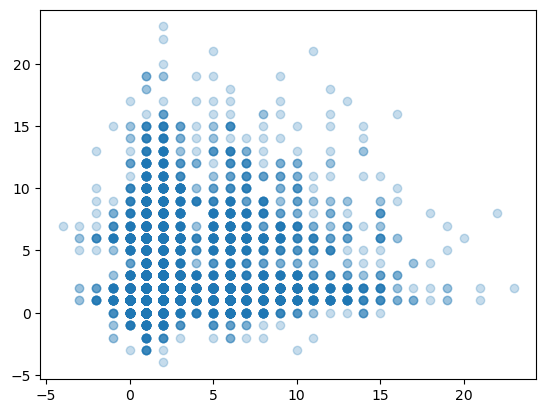

In [22]:
plt.scatter(pts[:,0],pts[:,1],alpha=0.25)

In [23]:
haaland = seasons_df.loc[seasons_df.name=='Erling Haaland',['total_points']].values

In [24]:
haaland

array([[ 2],
       [10],
       [ 5],
       [ 6],
       [ 5],
       [17],
       [ 4],
       [14],
       [13],
       [ 5],
       [ 1],
       [ 7],
       [ 2],
       [ 8],
       [ 8],
       [ 9],
       [ 6],
       [ 6],
       [13],
       [ 2],
       [ 6],
       [ 6],
       [ 2],
       [23],
       [ 2],
       [17],
       [ 4],
       [ 2],
       [12],
       [ 6],
       [ 6],
       [12],
       [ 1],
       [13],
       [17]], dtype=int64)

In [25]:
haaland.flatten()

array([ 2, 10,  5,  6,  5, 17,  4, 14, 13,  5,  1,  7,  2,  8,  8,  9,  6,
        6, 13,  2,  6,  6,  2, 23,  2, 17,  4,  2, 12,  6,  6, 12,  1, 13,
       17], dtype=int64)

In [26]:
win_len = 1
n_samples = (haaland.shape[0]//2)
n_feats = 2
n_step = 2
fancy_index = n_step*np.arange(n_samples)[:,None] + np.arange(n_feats)[None,:]

haaland = haaland.flatten()[fancy_index]
haaland

array([[ 2, 10],
       [ 5,  6],
       [ 5, 17],
       [ 4, 14],
       [13,  5],
       [ 1,  7],
       [ 2,  8],
       [ 8,  9],
       [ 6,  6],
       [13,  2],
       [ 6,  6],
       [ 2, 23],
       [ 2, 17],
       [ 4,  2],
       [12,  6],
       [ 6, 12],
       [ 1, 13]], dtype=int64)

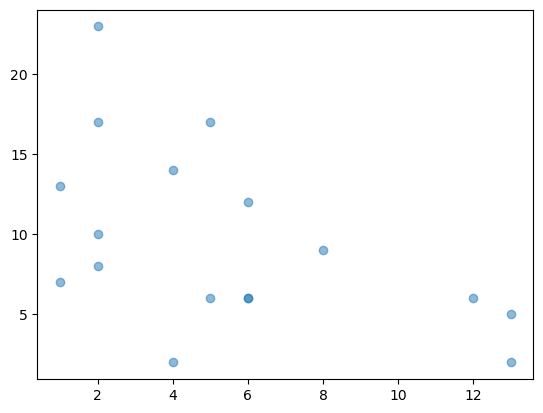

In [27]:
plt.scatter(haaland[:,0],haaland[:,1],alpha=0.5)

In [50]:
np_arr = []
win_len = 1
n_feats = 4
n_step = 1

for vals in data_arr:
    n_samples = vals.shape[0] - (n_feats - 1)
    fancy_index = n_step*np.arange(n_samples)[:,None] + np.arange(n_feats)[None,:]
    temp = vals.flatten()[fancy_index]
    np_arr.append(np.hstack((temp[:,0:3].mean(axis=1,keepdims=True),np.expand_dims(temp[:,-1],1))))

In [51]:
np_arr = np.vstack(np_arr)

In [52]:
np_arr.shape

(9748, 2)

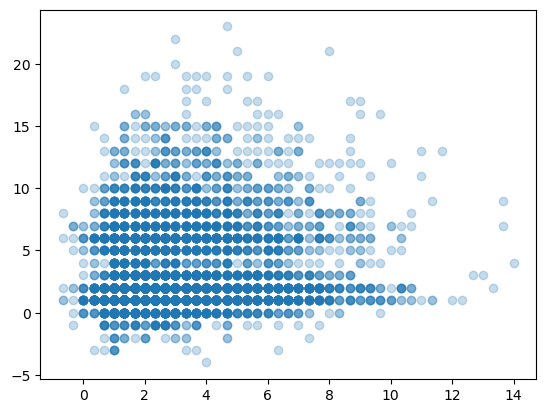

In [53]:
plt.scatter(np_arr[:,0],np_arr[:,1],alpha=0.25)

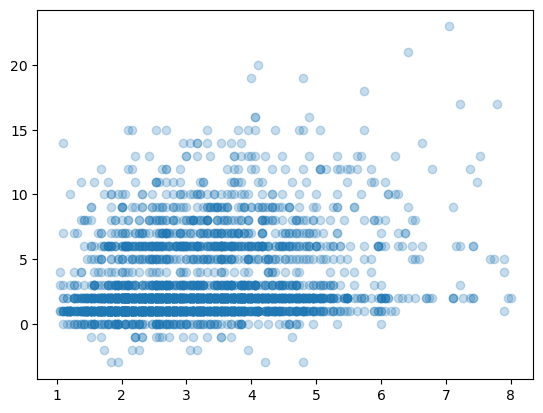

In [61]:
np_arr = []
win_len = 1
n_feats = 20
n_step = 1

for vals in data_arr:
    n_samples = vals.shape[0] - (n_feats - 1)
    fancy_index = n_step*np.arange(n_samples)[:,None] + np.arange(n_feats)[None,:]
    temp = vals.flatten()[fancy_index]
    np_arr.append(np.hstack((temp[:,0:n_feats-1].mean(axis=1,keepdims=True),np.expand_dims(temp[:,-1],1))))
    
np_arr = np.vstack(np_arr)
plt.scatter(np_arr[:,0],np_arr[:,1],alpha=0.25)